In [16]:
import os
import Lib.common as cm
import numpy as np
import pandas as pd
import tensorflow._api.v2.compat.v1 as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
import Lib.segmenter as sg
from scipy import signal

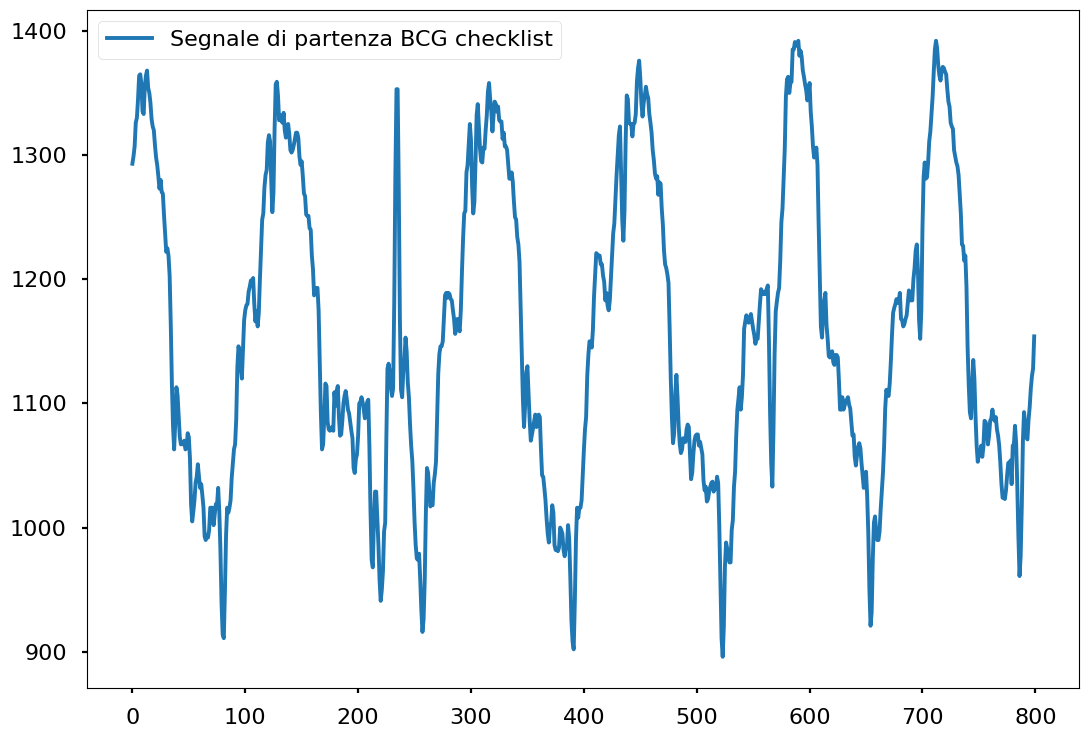

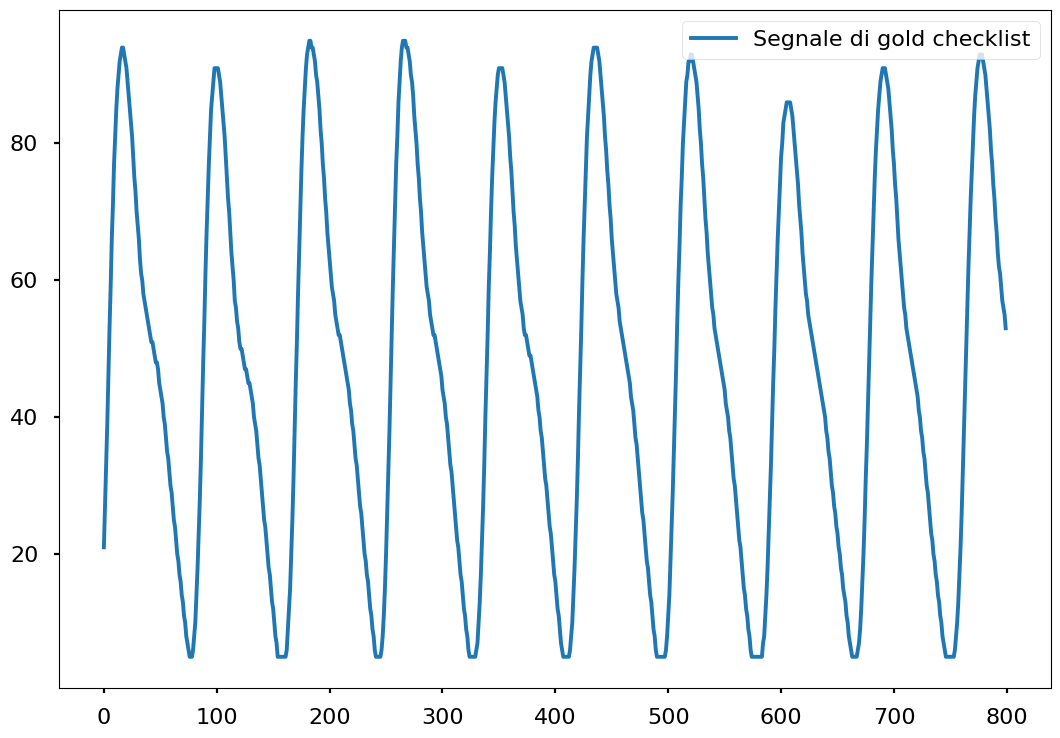

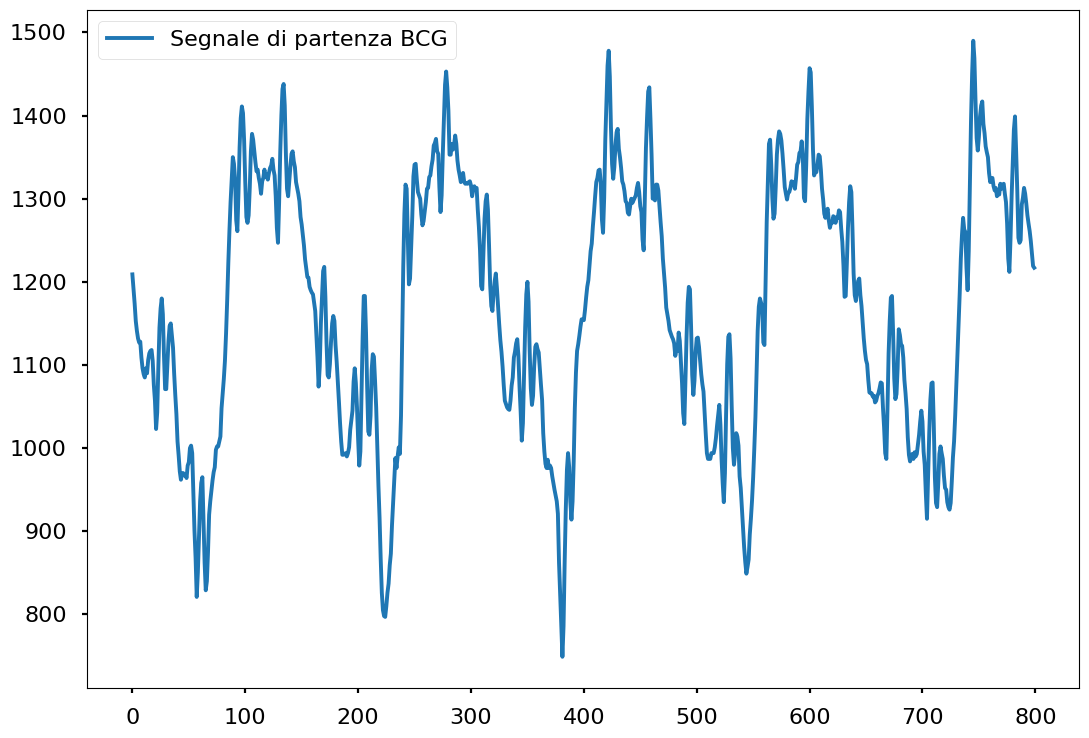

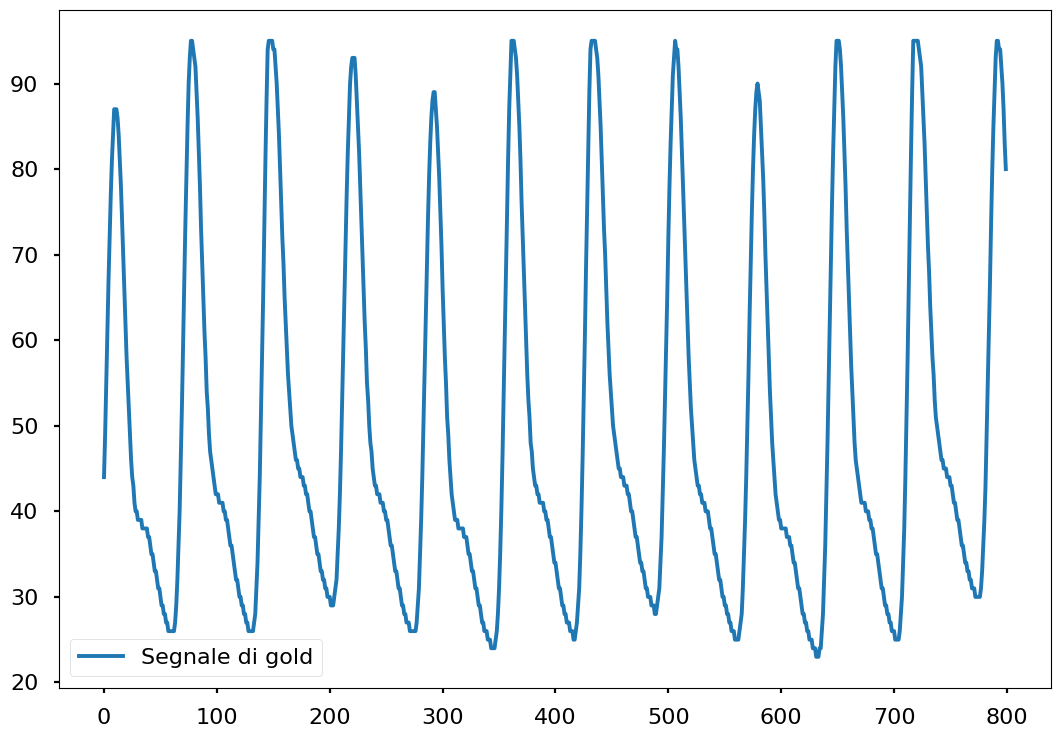

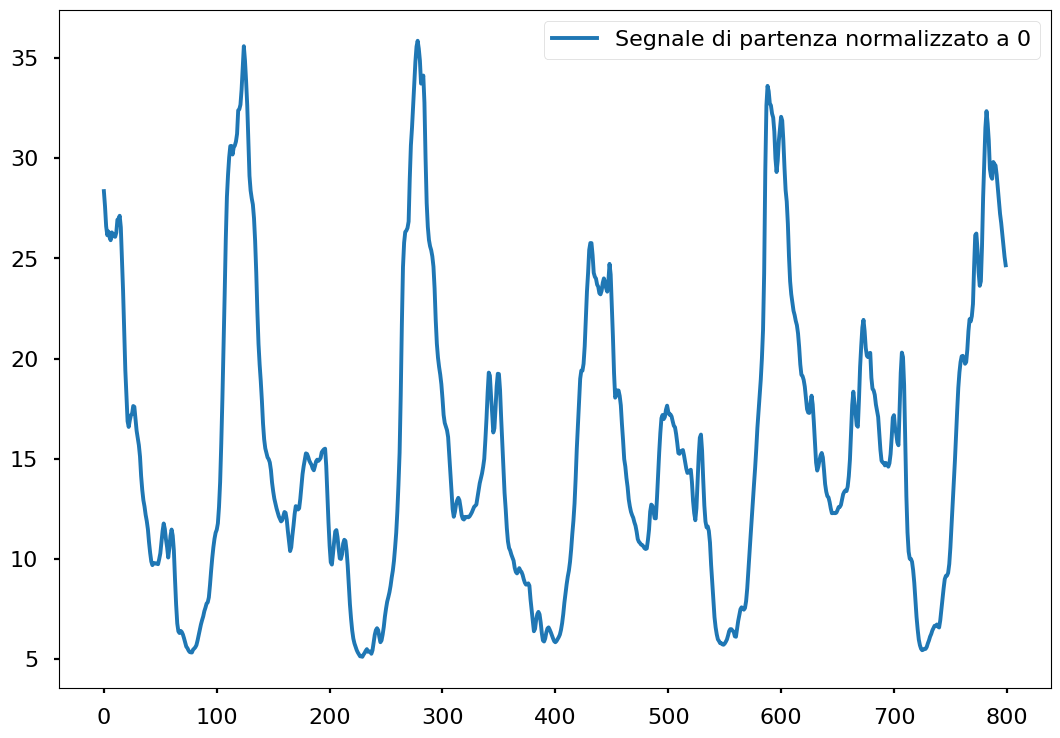

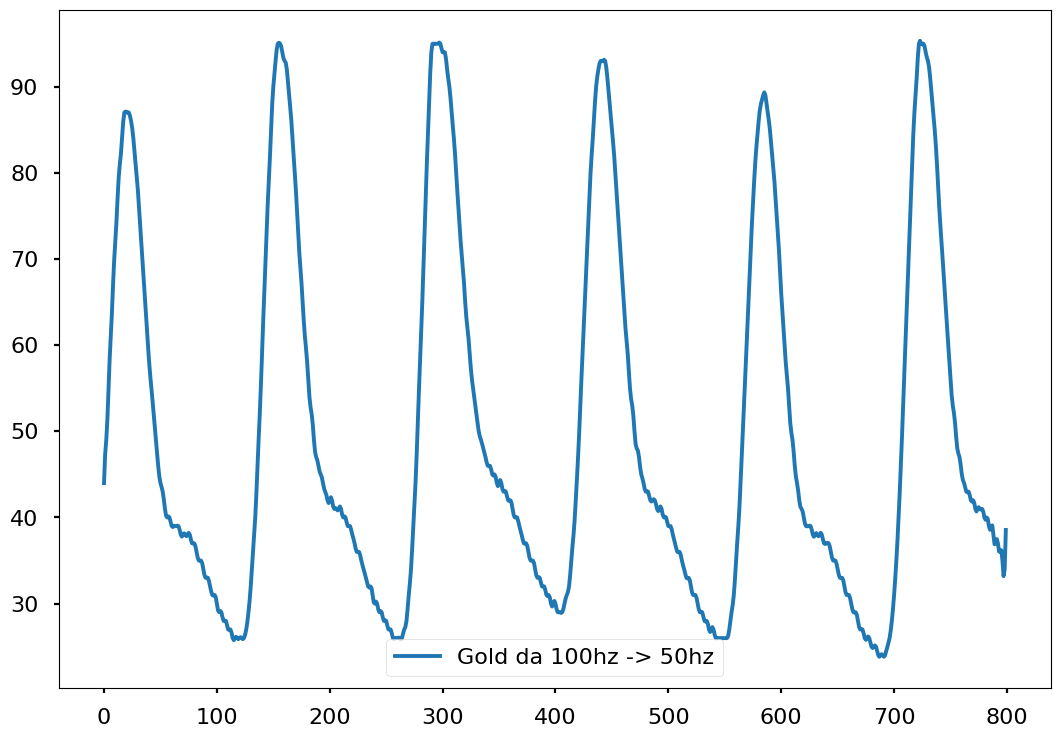

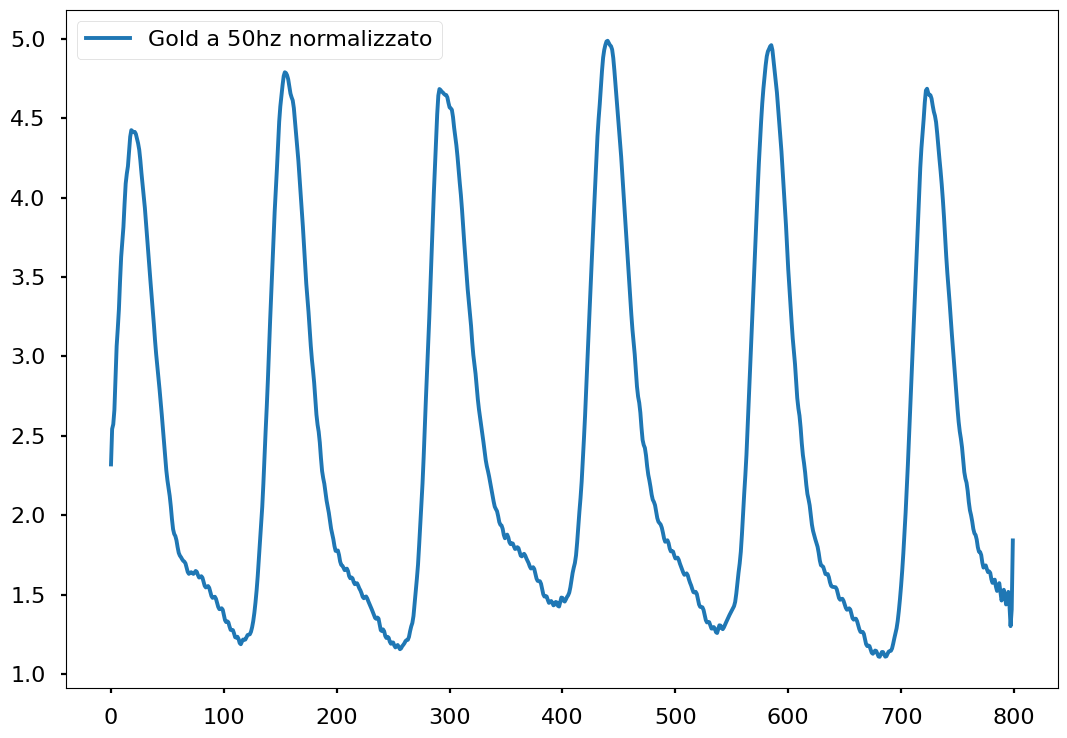

In [2]:
data = np.genfromtxt('C:/Users/dario/Desktop/Hassisto/Prova2/waveform-gold/gold.csv', delimiter=';')
data2 = np.genfromtxt('C:/Users/dario/Desktop/Hassisto/Prova2/sleeprawlive/sleeprawlive.csv', delimiter=';')


datacheck2 = np.genfromtxt('C:/Users/dario/Desktop/Hassisto/checklist2/beltsleeprawlive/sleepcheck2.csv', delimiter=';')
datacheck2g = np.genfromtxt('C:/Users/dario/Desktop/Hassisto/checklist2/waveform/waveformcheck2.csv', delimiter=';')


datanormalize=sg.renormalize_signal(data2[15000:15800],50)

goldresample=signal.resample(data[15000:15400],800)

plt.plot(datacheck2[100000:100800], label="Segnale di partenza BCG checklist")
plt.legend()
plt.figure()
plt.plot(datacheck2g[100000:100800],label="Segnale di gold checklist")
plt.legend()
plt.figure()

plt.plot(data2[15000:15800], label="Segnale di partenza BCG")
plt.legend()
plt.figure()
plt.plot(data[15000:15800],label="Segnale di gold")
plt.legend()
plt.figure()
plt.plot(datanormalize,label="Segnale di partenza normalizzato a 0")
plt.legend()
plt.figure()
plt.plot(goldresample,label="Gold da 100hz -> 50hz")
plt.legend()
plt.show()
goldnormalize=sg.renormalize_signal(data[15000:15800],100)
goldresample2=signal.resample(goldnormalize[:400],800)
plt.plot(goldresample2,label="Gold a 50hz normalizzato")
plt.legend()
plt.show()

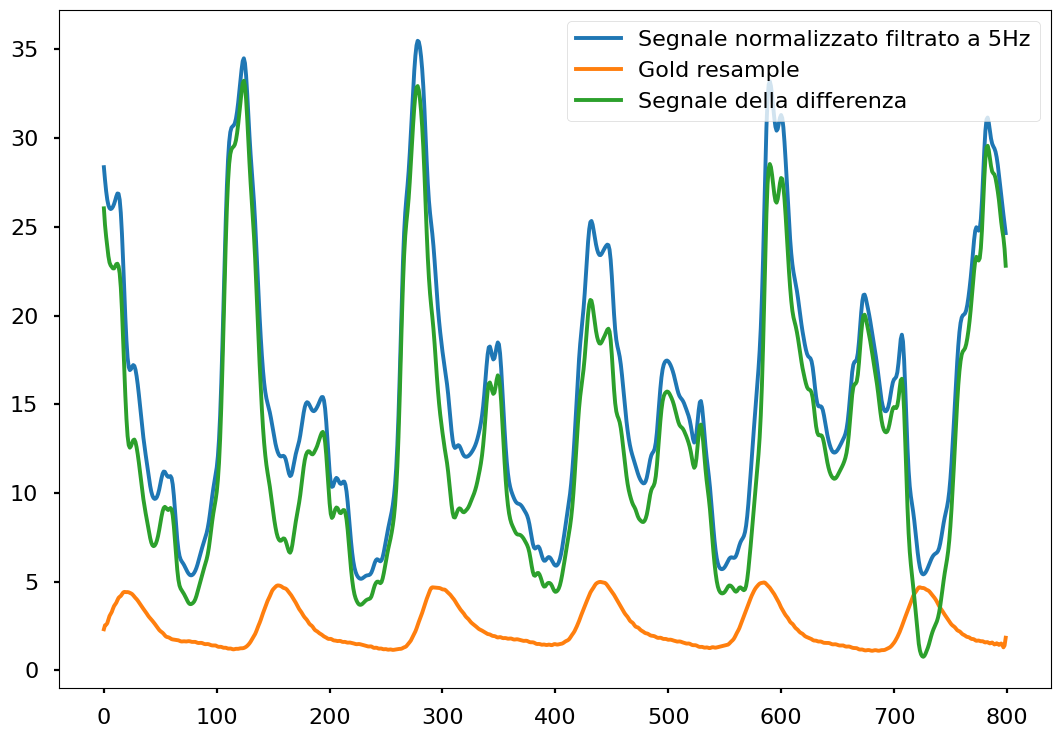

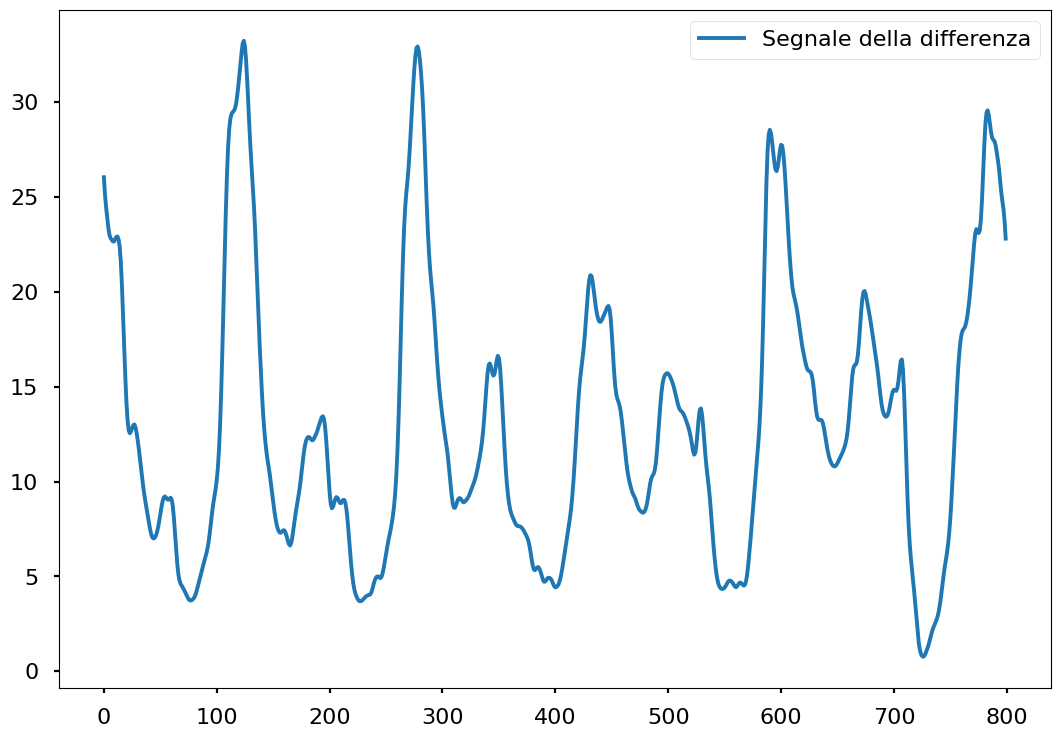

[26.04444837 25.10480426 24.44477391 23.8729792  23.34678537 22.98930078
 22.82845332 22.74104444 22.66048745 22.65699011 22.76864045 22.8978524
 22.92184634 22.77738549 22.38070304 21.58824625 20.33523357 18.75040526
 17.07053148 15.49660186 14.17182011 13.21797402 12.69764835 12.55253871
 12.63931689 12.81821061 12.97601344 13.01193288 12.87000854 12.57202835
 12.17522338 11.7098393  11.1858481  10.63685668 10.11551481  9.65074666
  9.2380091   8.86331053  8.51090851  8.1592218   7.80097946  7.46674721
  7.20757061  7.05388235  7.00206031  7.03527257  7.14332665  7.32462444
  7.58123082  7.90935707  8.28388114  8.6539179   8.95981809  9.15489562
  9.2185852   9.16993247  9.07877871  9.03908097  9.08992755  9.15383953
  9.07641813  8.73649169  8.11911336  7.30939724  6.44756674  5.68164606
  5.11881646  4.78275523  4.61128485  4.50918469  4.41180038  4.30209688
  4.18288362  4.05418471  3.92146569  3.80862039  3.74424806  3.73422661
  3.75990212  3.80668082  3.88451207  4.01424153  4.

In [3]:
'''print (len(data))
filteredbplowf=cm.filter_bandpass(data2[15000:15800],50,1,5)
plt.plot(filteredbplowf,label='Passa basso 1-5[Hz]')
plt.figure()
filteredbpmidf=cm.filter_bandpass(data2[15000:15800],50,2,10)
plt.plot(filteredbpmidf,label='Passa basso 6-10[Hz]')
plt.figure()
filteredbphigf=cm.filter_bandpass(data2[15000:15800],50,10,20)
plt.plot(filteredbphigf,label='Passa basso 10-20[Hz]')
plt.figure()'''
filteredl=cm.filter_lowpass(datanormalize,50,5)
plt.plot(filteredl, label="Segnale normalizzato filtrato a 5Hz")
plt.plot(goldresample2,label="Gold resample")
diffsignal=filteredl-goldresample2
plt.plot(diffsignal,label="Segnale della differenza")
plt.legend()
plt.figure()
plt.plot(diffsignal,label="Segnale della differenza")
plt.legend()
plt.show()

print(diffsignal)

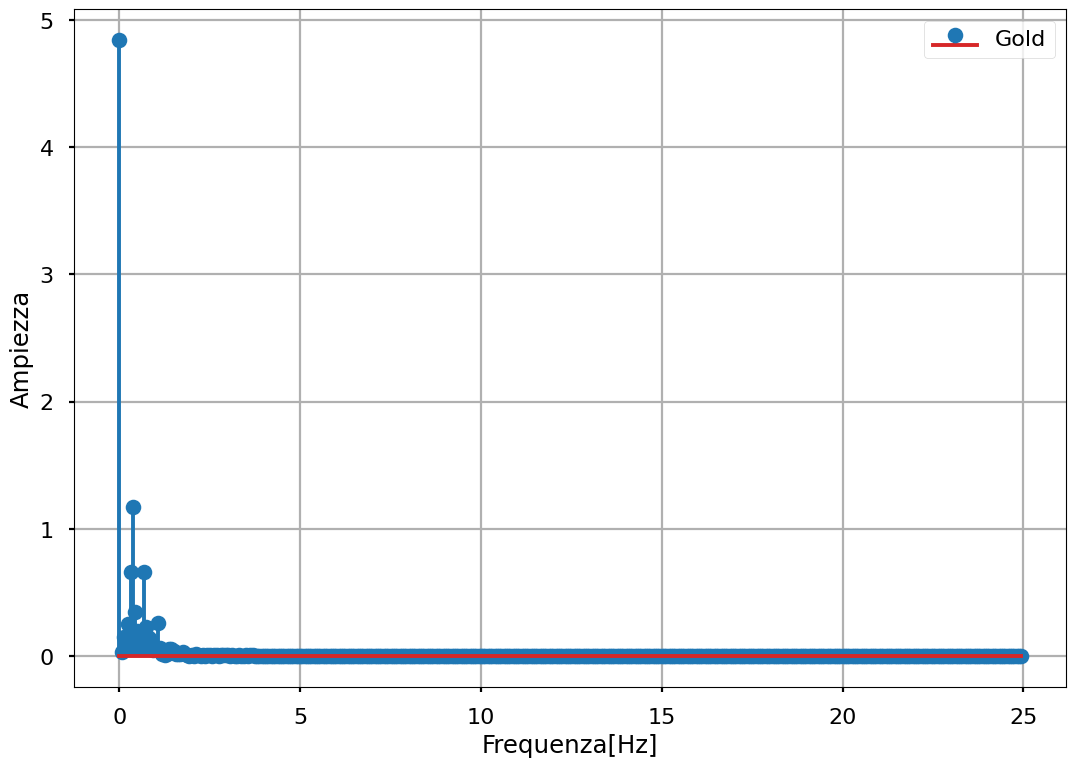

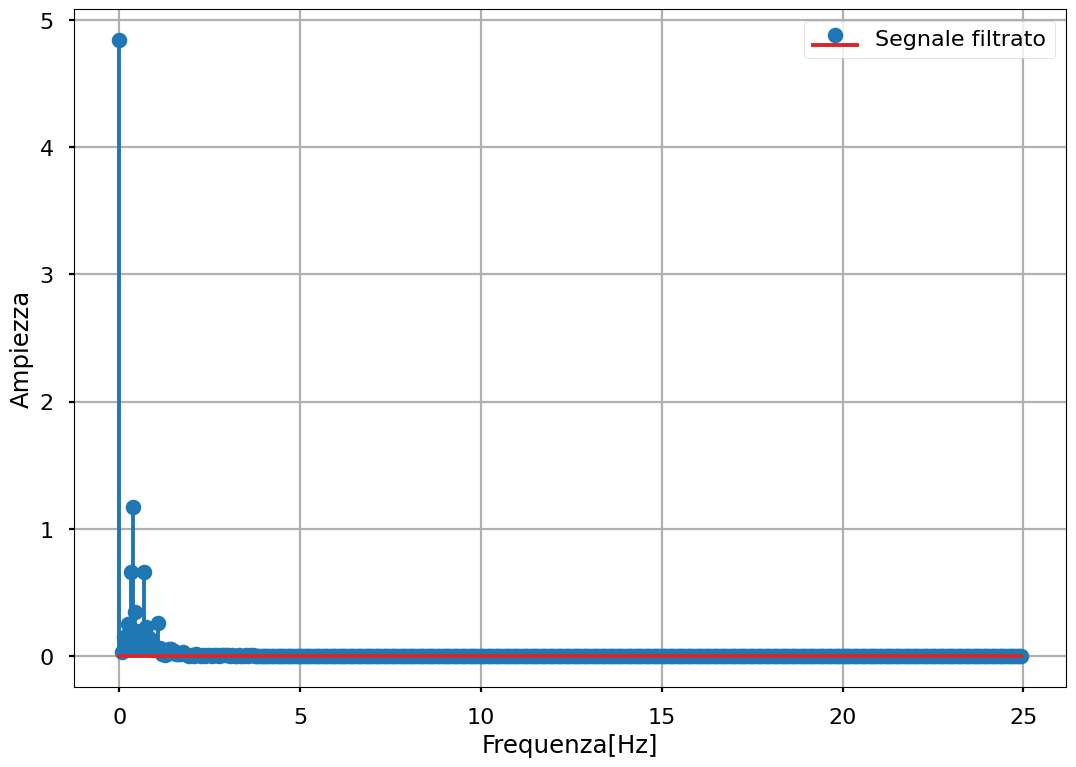

"\n#CODICE PROF\nimport numpy as np\nfrom matplotlib import pyplot as plt\nf = np.fft.fft(goldresample2-np.mean(goldresample2))\nfshift = np.fft.fftshift(f)\nmagnitude_spectrum1 = (np.abs(fshift))\nplt.figure()\nplt.subplot(211)\nplt.plot(magnitude_spectrum1)\nplt.title('Gold ts_spectrum')\n\nf = np.fft.fft(datanormalize-np.mean(datanormalize))\nfshift = np.fft.fftshift(f)\nmagnitude_spectrum2 = (np.abs(fshift))\nplt.subplot(212)\nplt.plot(magnitude_spectrum2)\nplt.title('ballist ts_spectrum')\nplt.show()\n"

In [4]:
#FOURIER TRANSFORM (DFT)
from scipy.fft import fft, fftfreq
# Number of sample points
N = 800
# sample spacing
T = 1.0 / 50.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = goldresample2
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]),label="Gold",)
plt.grid()
plt.xlabel("Frequenza[Hz]")
plt.ylabel("Ampiezza")
plt.legend()
plt.figure()
y2= filteredl
yf2 = fft(y2)
xf2 = fftfreq(N, T)[:N//2]
plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]),label="Segnale filtrato")
plt.grid()
plt.xlabel("Frequenza[Hz]")
plt.ylabel("Ampiezza")
plt.legend()
plt.show()
'''
#CODICE PROF
import numpy as np
from matplotlib import pyplot as plt
f = np.fft.fft(goldresample2-np.mean(goldresample2))
fshift = np.fft.fftshift(f)
magnitude_spectrum1 = (np.abs(fshift))
plt.figure()
plt.subplot(211)
plt.plot(magnitude_spectrum1)
plt.title('Gold ts_spectrum')

f = np.fft.fft(datanormalize-np.mean(datanormalize))
fshift = np.fft.fftshift(f)
magnitude_spectrum2 = (np.abs(fshift))
plt.subplot(212)
plt.plot(magnitude_spectrum2)
plt.title('ballist ts_spectrum')
plt.show()
'''

In [5]:
#COEFF FOURIER
from scipy import integrate


def fourier(li, lf, n, f):
    l = (lf-li)/2
    # Constant term
    a0=1/l*integrate.quad(lambda x: f(x), li, lf)[0]
    # Cosine coefficents
    A = np.zeros((n))
    # Sine coefficents
    B = np.zeros((n))

    for i in range(1,n+1):
        A[i-1]=1/l*integrate.quad(lambda x: f(x)*np.cos(i*np.pi*x/l), li, lf)[0]
        B[i-1]=1/l* integrate.quad(lambda x: f(x)*np.sin(i*np.pi*x/l), li, lf)[0]

    return [a0/2.0, A, B]

In [6]:
#VARIANZA DEVIAZIONE STANDARD MIN E MASSIMO
import pandas as pd

datafrm = pd.DataFrame(data=datanormalize,columns=['BCG'])
datafrm.describe()

,BCG
count,800.000000
mean,15.508426
std,7.577586
min,5.119111
25%,9.870647
50%,14.231864
75%,19.585126
max,35.866622


Area = 12380.229615493587


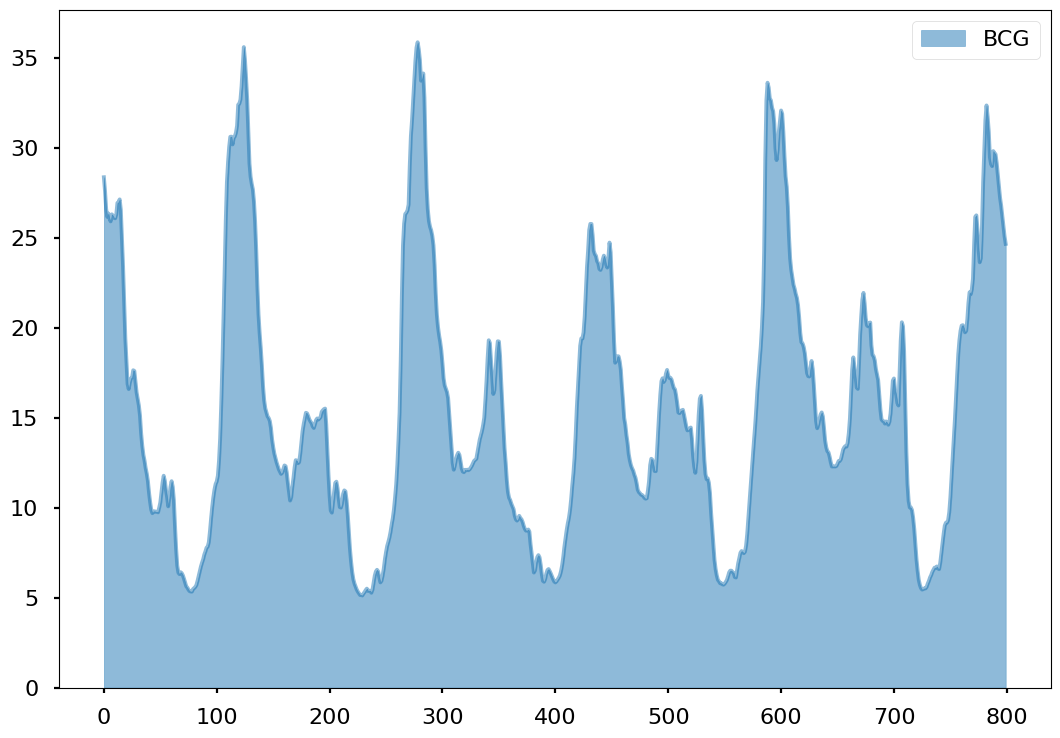

In [7]:
#AREA CURVA
'''import scipy.integrate as integrate
import scipy.special as special
result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)
result'''
from numpy import trapz

ax=datafrm.plot.area(stacked=False,legend="BCG")
area = trapz(datanormalize, dx=1)
print("Area =", area)